**Importing the libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Loading the Dataset**

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [16]:
sns.set_style('darkgrid')

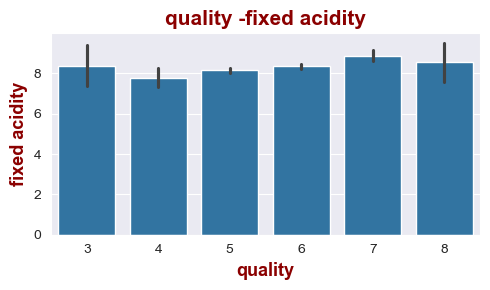

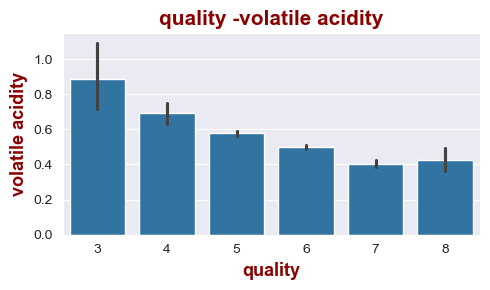

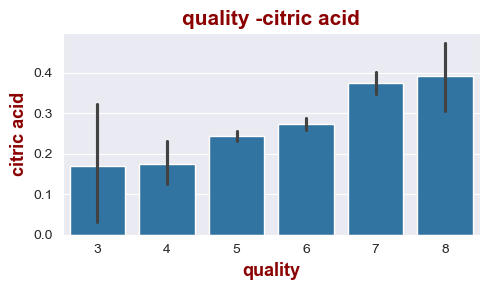

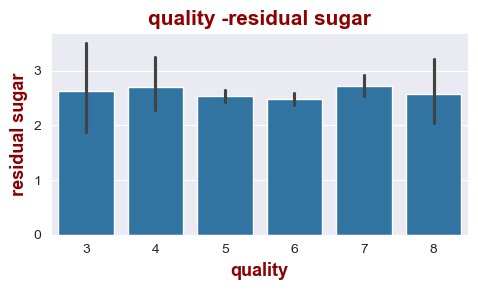

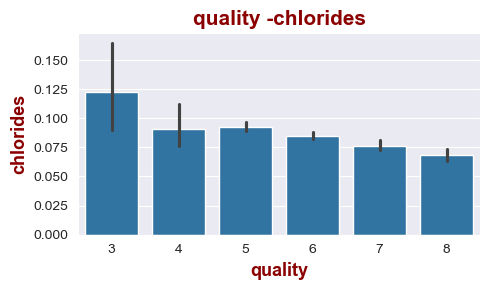

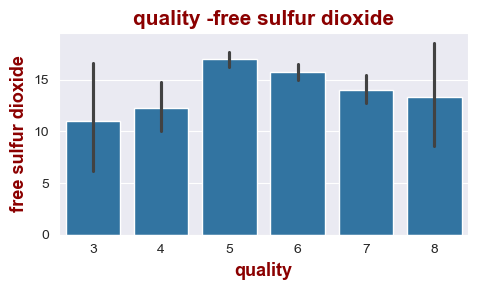

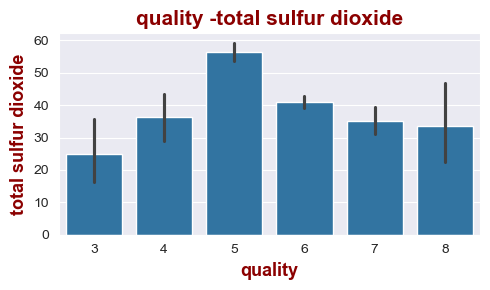

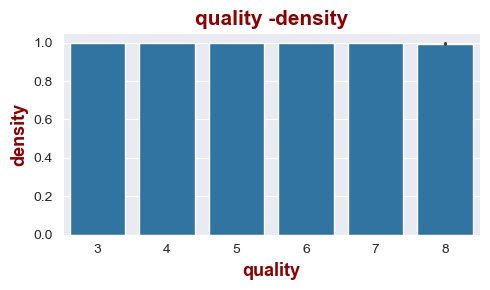

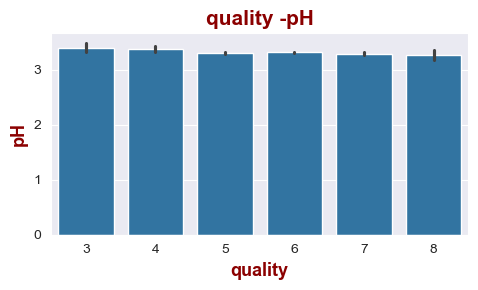

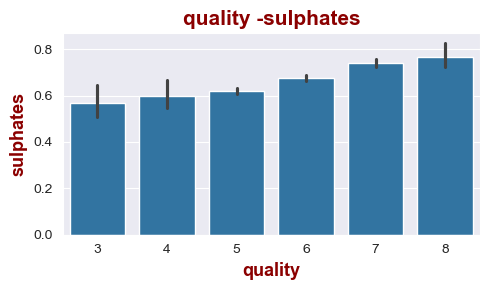

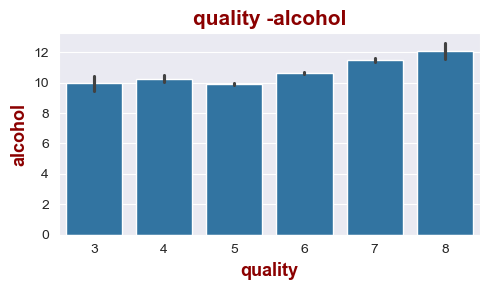

In [17]:
title_font = {'family':'arial', 'color':'darkred', 'weight':'bold','size':15}
axis_font = {'family':'arial', 'color':'darkred', 'weight':'bold','size':13}

for i in df.columns[:-1]:
    plt.figure(figsize=(5,3))
    sns.barplot(x = 'quality', y =i, data=df)

    plt.title(f'quality -{i}' , fontdict = title_font)
    plt.xlabel('quality', fontdict=axis_font)
    plt.ylabel(i,fontdict=axis_font)

    plt.tight_layout()
    plt.show()

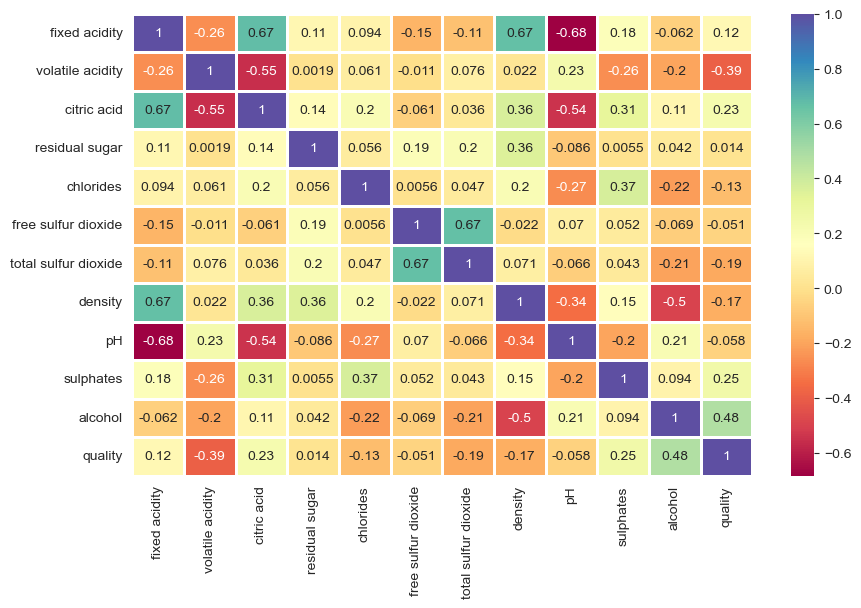

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, lw=.9, cmap="Spectral");

**Preparation for modelling**

In [24]:
df.drop(['residual sugar','free sulfur dioxide','pH'],axis=1,inplace=True)

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [26]:
bins = (2,6.5,8)
group_names = ['bad','good']
df.quality = pd.cut(df.quality, bins= bins, labels =group_names)

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,bad
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,bad
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,bad
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad


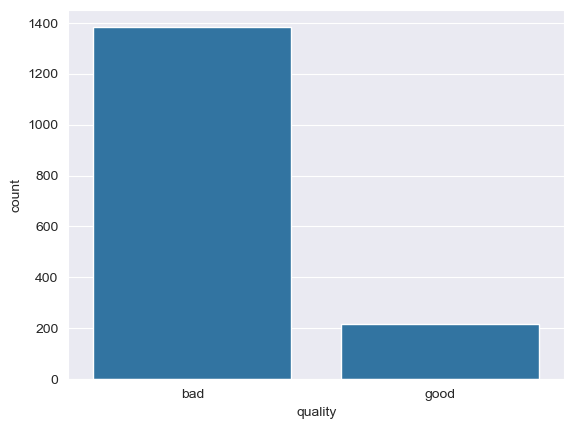

In [36]:
sns.countplot(x= df.quality);

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
new_quality = LabelEncoder()

In [39]:
df.quality = new_quality.fit_transform(df.quality)

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [41]:
df.quality.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [42]:
X= df.drop(['quality'],axis=1)
y=df['quality']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling**

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVC Modelling**

In [46]:
from sklearn.svm import SVC

In [47]:
svc_model = SVC()

In [48]:
svc_model.fit(X_train,y_train)

SVC()

In [51]:
y_pred = svc_model.predict(X_test)

In [52]:
cv_scores = cross_val_score(estimator=svc_model, X=X_train, y=y_train,cv=10)
cv_scores.mean()

0.8897699311023622

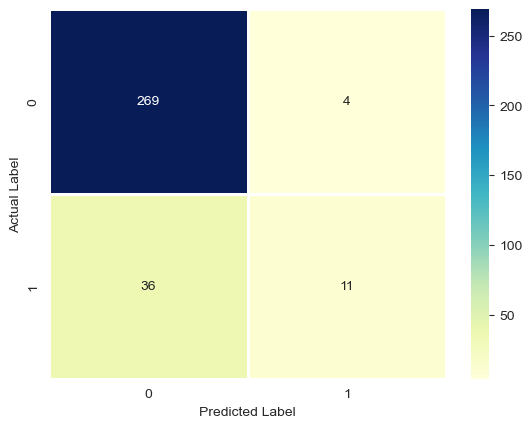

In [57]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix, annot=True, lw=1,  cmap='YlGnBu',fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.73      0.23      0.35        47

    accuracy                           0.88       320
   macro avg       0.81      0.61      0.64       320
weighted avg       0.86      0.88      0.85       320



**Hyperparameter Optimization with Python**

In [59]:
svc_model2 = SVC()

In [60]:
param_grid = {'C': [0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['poly','rbf']}

In [61]:
svc_cv_model= GridSearchCV(estimator=svc_model2,
    param_grid=param_grid,

    scoring=None,
    n_jobs=None,
    cv=10,
    verbose=0,)

In [62]:
svc_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf']})

In [64]:
svc_cv_model.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [66]:
svc_tuned = SVC(C=1,gamma=1, kernel='rbf')

In [67]:
svc_tuned.fit(X_train,y_train)

SVC(C=1, gamma=1)

In [68]:
y_pred = svc_tuned.predict(X_test)

In [69]:
cv_scores = cross_val_score(estimator=svc_tuned, X=X_train, y=y_train,cv=10)
cv_scores.mean()

0.8975885826771653

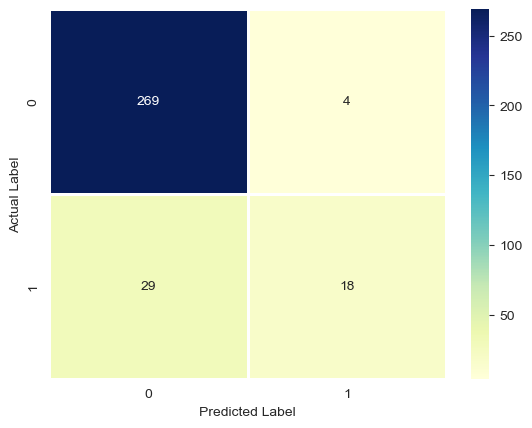

In [70]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix, annot=True, lw=1,  cmap='YlGnBu',fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.82      0.38      0.52        47

    accuracy                           0.90       320
   macro avg       0.86      0.68      0.73       320
weighted avg       0.89      0.90      0.88       320

